In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기기
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
# 학습한 결과로 트리를 생성 - tree.out 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

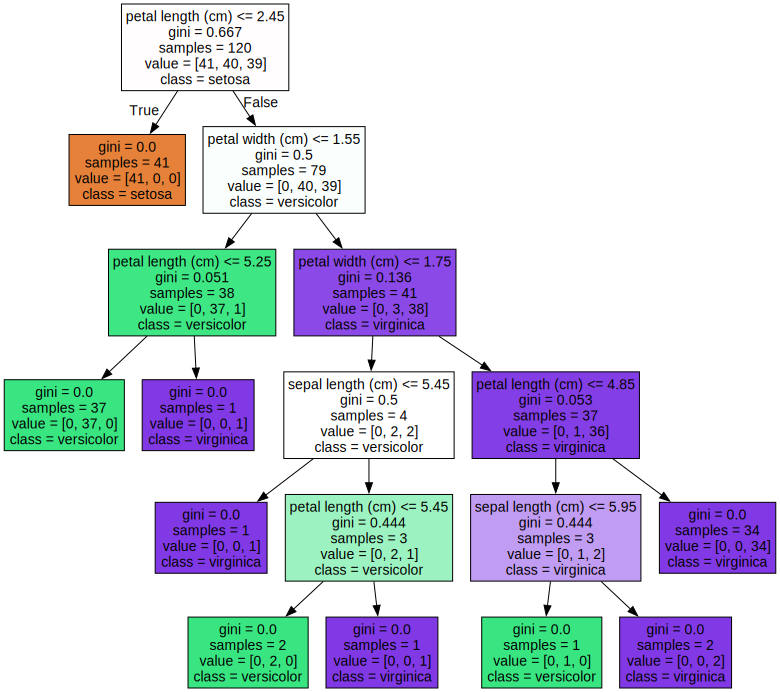

In [5]:
# 학습한 결과 트리 시각화
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred = dt_clf.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred))
print('confusion_matrix:\n', confusion_matrix(y_test, pred))
print('classification_report:\n', classification_report(y_test, pred, target_names= iris.target_names))

accuracy_score: 0.9333333333333333
confusion_matrix:
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
classification_report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## feature_importances_

Feature importance: 
 [0.02500521 0.         0.55490281 0.42009198]
sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


<Axes: >

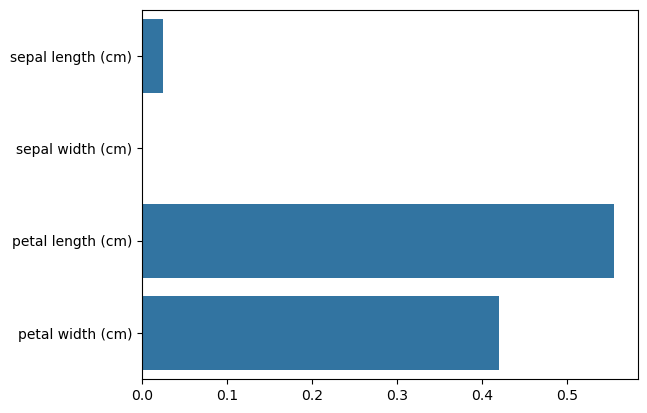

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importance: \n', dt_clf.feature_importances_)

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

#시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

# 하이퍼파라미터 튜닝

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2,5,10,20],
    'min_samples_leaf': [1,2,4,8],

}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=11), 
            param_grid=params, 
            scoring='accuracy',
            cv=5,
            verbose=1)

grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_

best_model = grid_search.best_estimator_

best_pred = best_model.predict(X_test)
accuracy_score(y_test, best_pred)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


0.8666666666666667

0.95 > 훈련 데이터 검증 정확도 > 테스트 데이터 예측 0.86 > 과적합

# 결정 트리 실습 - 사용자 행동 인식 데이터 세트 p.200 

# 보팅 분류기

In [9]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# Voting 앙상블
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#학습
vo_clf.fit(X_train, y_train)

#평가
pred= vo_clf.predict(X_test)
print('VotingClassifier accuracy:',accuracy_score(y_test, pred))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    class_name = classifier.__class__.__name__
    print(class_name, accuracy)


VotingClassifier accuracy: 0.956140350877193
LogisticRegression 0.9473684210526315
KNeighborsClassifier 0.9385964912280702


In [11]:
# 개별 분류기의 예측 성능 - LR, KNN

#LR
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred= lr_clf.predict(X_test)
print('LogisticRegression accuracy:',accuracy_score(y_test, pred))

LogisticRegression accuracy: 0.9473684210526315


In [12]:
#KNN
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train, y_train)
pred= knn_clf.predict(X_test)
print('KNeighborsClassifier accuracy:',accuracy_score(y_test, pred))

KNeighborsClassifier accuracy: 0.9385964912280702


# 랜덤 포레스트

In [13]:
#  중복컬럼이름 정리리
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [14]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [15]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('RandomForest Accuracy', accuracy)

RandomForest Accuracy 0.9219545300305395


In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_split': [2,8,16],
    'min_samples_leaf': [1,6,12],
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('RandomForest+GridSearchCV 최적 모델:', grid_cv.best_estimator_)
print('RandomForest+GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
print('RandomForest+GridSearchCV 최고 예측 정확도:', grid_cv.best_score_)
print('RandomForest+GridSearchCV Accuracy:', accuracy)



RandomForest+GridSearchCV 최적 모델: RandomForestClassifier(max_depth=16, min_samples_leaf=6, min_samples_split=16,
                       n_jobs=-1, random_state=0)
RandomForest+GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
RandomForest+GridSearchCV 최고 예측 정확도: 0.9156692056583242
RandomForest+GridSearchCV Accuracy: 0.9209365456396336


In [30]:

# 최적 모델, 하이퍼 파리미터 적용
rf_clf_1 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=0)
rf_clf_1.fit(X_train, y_train)
pred_1 = rf_clf_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, pred_1)

print('최적 하이퍼 파리미터 적용 후 RandomForest+GridSearchCV Accuracy', accuracy_1)

최적 하이퍼 파리미터 적용 후 RandomForest+GridSearchCV Accuracy 0.9253478113335596


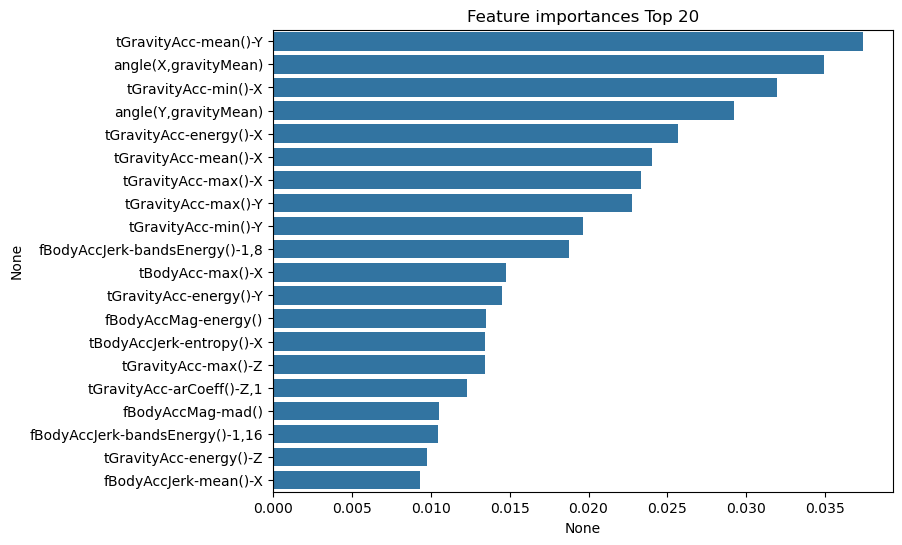

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf_1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

# Gradient Boosting Machine GBM


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import time

X_train, X_test, y_train, y_test = get_human_dataset()
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('GBM Accuracy:', accuracy_score(y_test, gb_pred))
print(f'GBM 수행시간: {time.time()-start_time}')

GBM Accuracy: 0.9375636240244316
GBM 수행시간: 1432.4476993083954
